![](CintillaTecNM-ITD.png)

# Uso de Python para el análisis de datos aplicado en la investigación 

**Rodriguez-Rivas José Gabriel**  
Tecnológico Nacional de México / Instituto Tecnológico de Durango  
gabriel.rodriguez@itdurango.edu.mx

**Rodríguez Castillo Sofia**  
Tecnológico Nacional de México / Instituto Tecnológico de Durango  
19041166@itdurango.edu.mx


### Resumen
Python es un lenguaje de programación de propósito general, independiente de la plataforma y orientado a objetos, que no fue diseñado específicamente para el análisis de datos o la computación científica, pero que, en los últimos años se ha destacado como una alternativa para tareas de análisis y visualización de grandes conjuntos de datos. El amplio y variado ecosistema de librerías del que dispone para el análisis de datos ha provocado que cada vez más personas lo utilicen para estos fines. En este estudio se utilizó Python para el análisis de la base de datos de las pruebas realizadas por presencia de COVID. La base de datos es publicada por la Dirección General de Epidemiología de la Secretaría de Salud.

El objetivo fue desarrollar en el lenguaje de programación Python un análisis estadístico de los datos de COVID-19 en México para determinar su viabilidad de uso como alternativa a otras herramientas estadísticas para análisis de datos. El estudio se desarrolló bajo un enfoque cuantitativo, de tipo descriptivo y para la recolección de los datos se utilizó la técnica de datos secundarios.



### Metodología

El presente estudio se desarrolló bajo un enfoque cuantitativo y se utiliza información cuantificable para describir o tratar de explicar los fenómenos que se estudian. El diseño de la investigación es no experimental y de tipo transversal que se utilizan para describir y analizar variables en un momento dado, y de tipo descriptivo para establecer la forma de distribución de una o más variables en el ámbito del colectivo [10].

Para la recolección de los datos se utilizó la técnica de datos secundarios, la cual involucra la revisión y/o utilización de registros públicos y archivos electrónicos, y en este sentido, se utilizó la base  de datos de la Dirección General de Epidemiología de la Secretaría de Salud que mantiene el registro sobre las personas que se realizaron la prueba para identificar la presencia de la enfermedad del COVID.

Debido a la gran cantidad de datos, el dataset de información de COVID-19 está dividido por años. Se descargó el dataset del año 2020 que contiene 3,868,396 registros; el dataset del 2021 con 8,765,798 registros; y finalmente el dataset al 30 de agosto del 2022 con 5,462,866 registros. Se unieron los 3 en uno solo que se denominó covidMX con 18,097,060 registros y 40 variables de las cuales se eliminaron 18 columnas por no considerarse útiles para el estudio. Al final se ocupan  3.1+ GB en memoria de acuerdo con el método info() de la librería Pandas. Cabe mencionar que la información cuenta con una licencia de libre uso. De igual forma, se puede acceder a las bases de datos históricas en la dirección URL: https://www.gob.mx/salud/documentos/datos-abiertos-bases-historicas-direccion-general-de-epidemiologia.

Las 22 columnas restantes tienen información de la entidad de nacimiento, fecha de ingreso, fecha de defunción, sexo, tipo paciente, resultado del antígeno, clasificación final, además de información referente a algunas comorbilidades como diabetes,  asma, hipertensión, tabaquismo, renal crónica, entre otros.


## Variables del dataset
El  conjunto de datos contiene entre otras, las siguientes variables:

| Variable      | Descripcion |
| ------------- | ---------------------------------------------- |
| **RESULTADO_ANTIGENO**     | **1 =**  Positivo SARS-CoV-2, **2 =** Negativo SARS-CoV-2,  **97=** No Aplica (Caso sin mUestra) |
| TIPO_PACIENTE | **1 =** AMBULATORIO, **2 =** HOSPITALIZADO **99 =**  NO ESPECIFICADO     |
| SEXO          | **1 =** MUJER, **2 =** HOMBRE, **99 =** NO ESPECIFICADO      |
| NACIONALIDAD  | **1 =** MEXICANA, **2 =** EXTRANJERA, **99 =** NO ESPECIFICADO       |
| ORIGEN        | **1 =** USMER, **2 =** FUERA DE USMER, **99 =** NO ESPECIFICADO |

Ademas, existen las siguientes variables relacionadas con el padecimiento de una comorbilidad

UCI, INTUBADO, NEUMONIA, DIABETES, EPOC, ASMA, INMUSUPR, HIPERTENSION, CARDIOVASCULAR,
OBESIDAD, RENAL_CRONICA, TABAQUISMO, OTRA_CON
y pueden tener estos valores

| Variable      | Descripcion |
| ------------- | ---------------------------------------------- |
| 1   |  SI              |
| 2   |  NO              |
| 97  |  NO APLICA       |
| 98  |  SE IGNORA       |
| 99  |  NO ESPECIFICADO |





In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [2]:
covid1 = pd.read_csv("COVID19MEXICO2020.csv")
covid1.head()

C:\Users\jgab\AppData\Local\Temp\ipykernel_19916\3032972328.py:1: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  covid1 = pd.read_csv("COVID19MEXICO2020.csv")


,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2021-10-31,z4d6fe,1,6,24,1,24,24,28,1,...,2,1,1,2,97,3,99,México,97,97
1,2021-10-31,z2a3cf,1,6,24,2,24,24,28,1,...,1,2,97,2,97,6,99,México,97,97
2,2021-10-31,z1e370,1,12,14,1,14,14,85,1,...,2,1,2,2,97,7,99,México,97,97
3,2021-10-31,z3bf80,2,12,8,2,8,8,37,1,...,2,1,1,2,97,3,99,México,97,97
4,2021-10-31,zz7067,1,12,9,2,9,9,7,1,...,2,1,2,2,97,7,99,México,97,97


In [3]:
# El metodo info, proporciona información sobre el tipo de dato de cada variable, los 
# nombres de las columnas y la cantidad de memoria ocupada por el conjunto de datos.
# En el año 2020 existen 3,868,395 registros, el espacio ocupado en memoria es de
# 1.2+ GB, por lo tanto, En total son 40 columnas y eliminaremos las que no son de interes 

covid1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3868396 entries, 0 to 3868395
Data columns (total 40 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   FECHA_ACTUALIZACION    object
 1   ID_REGISTRO            object
 2   ORIGEN                 int64 
 3   SECTOR                 int64 
 4   ENTIDAD_UM             int64 
 5   SEXO                   int64 
 6   ENTIDAD_NAC            int64 
 7   ENTIDAD_RES            int64 
 8   MUNICIPIO_RES          int64 
 9   TIPO_PACIENTE          int64 
 10  FECHA_INGRESO          object
 11  FECHA_SINTOMAS         object
 12  FECHA_DEF              object
 13  INTUBADO               int64 
 14  NEUMONIA               int64 
 15  EDAD                   int64 
 16  NACIONALIDAD           int64 
 17  EMBARAZO               int64 
 18  HABLA_LENGUA_INDIG     int64 
 19  INDIGENA               int64 
 20  DIABETES               int64 
 21  EPOC                   int64 
 22  ASMA                   int64 
 23  INMUSUP

In [4]:
# Eliminamos las columnas que no son de nuestro interes con el fin de reducir el
# espacio ocupado en memoria
# Se eliminan 18 columnas

covid1.drop(['FECHA_ACTUALIZACION','ID_REGISTRO','ORIGEN', 'ENTIDAD_RES','MUNICIPIO_RES', 
             'ENTIDAD_UM', 'HABLA_LENGUA_INDIG','INDIGENA', 'MIGRANTE', 'PAIS_NACIONALIDAD',
             'PAIS_ORIGEN', 'TOMA_MUESTRA_ANTIGENO', 'OTRO_CASO', 'FECHA_SINTOMAS', 
             'OTRA_COM', 'NACIONALIDAD' ,'INMUSUPR', 'RESULTADO_LAB'],
              axis=1, inplace=True)

In [5]:
# Al revisar vemos que anteriormente ocupaba un espacio de 1.2+ GB y al reducir 
# las columnas, se reduce a 649.3+ MB
covid1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3868396 entries, 0 to 3868395
Data columns (total 22 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   SECTOR               int64 
 1   SEXO                 int64 
 2   ENTIDAD_NAC          int64 
 3   TIPO_PACIENTE        int64 
 4   FECHA_INGRESO        object
 5   FECHA_DEF            object
 6   INTUBADO             int64 
 7   NEUMONIA             int64 
 8   EDAD                 int64 
 9   EMBARAZO             int64 
 10  DIABETES             int64 
 11  EPOC                 int64 
 12  ASMA                 int64 
 13  HIPERTENSION         int64 
 14  CARDIOVASCULAR       int64 
 15  OBESIDAD             int64 
 16  RENAL_CRONICA        int64 
 17  TABAQUISMO           int64 
 18  TOMA_MUESTRA_LAB     int64 
 19  RESULTADO_ANTIGENO   int64 
 20  CLASIFICACION_FINAL  int64 
 21  UCI                  int64 
dtypes: int64(20), object(2)
memory usage: 649.3+ MB


In [ ]:
covid2 = pd.read_csv("COVID19MEXICO2021.csv")
covid2.head()

C:\Users\jgab\AppData\Local\Temp\ipykernel_19916\2308030978.py:1: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  covid2 = pd.read_csv("COVID19MEXICO2021.csv")


In [7]:
# Eliminamos las columnas que no son de nuestro interes con el fin de reducir el
# espacio ocupado en memoria
# Se eliminan 16 columnas

covid2.drop(['FECHA_ACTUALIZACION','ID_REGISTRO','ORIGEN', 'ENTIDAD_RES','MUNICIPIO_RES', 
             'ENTIDAD_UM', 'HABLA_LENGUA_INDIG','INDIGENA', 'MIGRANTE', 'PAIS_NACIONALIDAD',
             'PAIS_ORIGEN', 'TOMA_MUESTRA_ANTIGENO', 'OTRO_CASO', 'FECHA_SINTOMAS', 
             'OTRA_COM', 'NACIONALIDAD' ,'INMUSUPR', 'RESULTADO_LAB'],
              axis=1, inplace=True)

In [8]:
# Después de eliminar las columnas inncesarias se observa que son 8,830,345 registros
# que ocupa un espacio en memoria de 1.4+ GB
covid2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8830345 entries, 0 to 8830344
Data columns (total 22 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   SECTOR               int64 
 1   SEXO                 int64 
 2   ENTIDAD_NAC          int64 
 3   TIPO_PACIENTE        int64 
 4   FECHA_INGRESO        object
 5   FECHA_DEF            object
 6   INTUBADO             int64 
 7   NEUMONIA             int64 
 8   EDAD                 int64 
 9   EMBARAZO             int64 
 10  DIABETES             int64 
 11  EPOC                 int64 
 12  ASMA                 int64 
 13  HIPERTENSION         int64 
 14  CARDIOVASCULAR       int64 
 15  OBESIDAD             int64 
 16  RENAL_CRONICA        int64 
 17  TABAQUISMO           int64 
 18  TOMA_MUESTRA_LAB     int64 
 19  RESULTADO_ANTIGENO   int64 
 20  CLASIFICACION_FINAL  int64 
 21  UCI                  int64 
dtypes: int64(20), object(2)
memory usage: 1.4+ GB


In [9]:
# El archivo del año 2022 tiene registros del año 2021
# 
covid2['FECHA_INGRESO'].value_counts().sort_index()

2021-01-01     1367
2021-01-02     5499
2021-01-03     4326
2021-01-04    27621
2021-01-05    33413
              ...  
2022-02-26        7
2022-02-27       12
2022-02-28        8
2022-03-01        8
2022-03-02        6
Name: FECHA_INGRESO, Length: 426, dtype: int64

In [11]:
# el tipo de dato de la variable FECHA_INGRESO es de tipo texto, por lo tanto, 
#  tenemos que convertir a tipo de dato **datetime**

covid2['FECHA_INGRESO'] = pd.to_datetime(covid2['FECHA_INGRESO'], format="%Y/%m/%d")

In [12]:
# Redefinimos covid2 con una consulta para filtrar los registros 
# del año 2021 y eliminar los del 2022
covid2 = covid2[ covid2["FECHA_INGRESO"] < "2022-01-01"]


In [13]:
# verificamos
covid2['FECHA_INGRESO'].value_counts().sort_index()

2021-01-01     1367
2021-01-02     5499
2021-01-03     4326
2021-01-04    27621
2021-01-05    33413
              ...  
2021-12-27    27651
2021-12-28    30502
2021-12-29    33534
2021-12-30    34970
2021-12-31    28758
Name: FECHA_INGRESO, Length: 365, dtype: int64

In [14]:
# después de eliminar los registros del año 2022 se tienen 8,765,798 

covid2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8765798 entries, 0 to 8830344
Data columns (total 22 columns):
 #   Column               Dtype         
---  ------               -----         
 0   SECTOR               int64         
 1   SEXO                 int64         
 2   ENTIDAD_NAC          int64         
 3   TIPO_PACIENTE        int64         
 4   FECHA_INGRESO        datetime64[ns]
 5   FECHA_DEF            object        
 6   INTUBADO             int64         
 7   NEUMONIA             int64         
 8   EDAD                 int64         
 9   EMBARAZO             int64         
 10  DIABETES             int64         
 11  EPOC                 int64         
 12  ASMA                 int64         
 13  HIPERTENSION         int64         
 14  CARDIOVASCULAR       int64         
 15  OBESIDAD             int64         
 16  RENAL_CRONICA        int64         
 17  TABAQUISMO           int64         
 18  TOMA_MUESTRA_LAB     int64         
 19  RESULTADO_ANTIGENO   

In [15]:
# enseguida concatenamos los 2 dataset en uno solo
# El dataset covid tiene 12,634,194 registros y ocupa en memoria  2.2+ GB

covid = pd.concat([covid1, covid2])

In [16]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12634194 entries, 0 to 8830344
Data columns (total 22 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   SECTOR               int64 
 1   SEXO                 int64 
 2   ENTIDAD_NAC          int64 
 3   TIPO_PACIENTE        int64 
 4   FECHA_INGRESO        object
 5   FECHA_DEF            object
 6   INTUBADO             int64 
 7   NEUMONIA             int64 
 8   EDAD                 int64 
 9   EMBARAZO             int64 
 10  DIABETES             int64 
 11  EPOC                 int64 
 12  ASMA                 int64 
 13  HIPERTENSION         int64 
 14  CARDIOVASCULAR       int64 
 15  OBESIDAD             int64 
 16  RENAL_CRONICA        int64 
 17  TABAQUISMO           int64 
 18  TOMA_MUESTRA_LAB     int64 
 19  RESULTADO_ANTIGENO   int64 
 20  CLASIFICACION_FINAL  int64 
 21  UCI                  int64 
dtypes: int64(20), object(2)
memory usage: 2.2+ GB


In [17]:
# Borramos los objetos dataframes para liberar memoria
del covid1 
del covid2 

In [18]:
covid3 = pd.read_csv("220830COVID19MEXICO.csv")
covid3.head()

C:\Users\jgab\AppData\Local\Temp\ipykernel_19916\152271341.py:1: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  covid3 = pd.read_csv("220830COVID19MEXICO.csv")


,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2022-08-30,0f43ef,1,12,22,1,9,22,14,1,...,1,1,2,1,2,7,99,México,97,97
1,2022-08-30,17d678,1,12,16,1,16,16,67,2,...,2,2,97,1,2,7,99,México,97,2
2,2022-08-30,04f190,2,6,9,1,9,9,15,1,...,2,2,97,2,97,6,99,México,97,97
3,2022-08-30,1d1a67,1,12,18,1,18,18,7,1,...,2,2,97,1,1,3,99,México,97,97
4,2022-08-30,13c92b,2,12,9,1,9,9,2,1,...,1,2,97,1,2,7,99,México,97,97


In [19]:
# el dataset del año 2022 tiene 5,462,866 registros ocupando 1.6+ GB en memoria
# por lo tanto, se borran las mismas 16 columnas que en procesos anteriores

covid3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5462866 entries, 0 to 5462865
Data columns (total 40 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   FECHA_ACTUALIZACION    object
 1   ID_REGISTRO            object
 2   ORIGEN                 int64 
 3   SECTOR                 int64 
 4   ENTIDAD_UM             int64 
 5   SEXO                   int64 
 6   ENTIDAD_NAC            int64 
 7   ENTIDAD_RES            int64 
 8   MUNICIPIO_RES          int64 
 9   TIPO_PACIENTE          int64 
 10  FECHA_INGRESO          object
 11  FECHA_SINTOMAS         object
 12  FECHA_DEF              object
 13  INTUBADO               int64 
 14  NEUMONIA               int64 
 15  EDAD                   int64 
 16  NACIONALIDAD           int64 
 17  EMBARAZO               int64 
 18  HABLA_LENGUA_INDIG     int64 
 19  INDIGENA               int64 
 20  DIABETES               int64 
 21  EPOC                   int64 
 22  ASMA                   int64 
 23  INMUSUP

In [20]:
# Eliminamos las columnas que no son de nuestro interes con el fin de reducir el
# espacio ocupado en memoria
# Se eliminan 16 columnas

covid3.drop(['FECHA_ACTUALIZACION','ID_REGISTRO','ORIGEN', 'ENTIDAD_RES','MUNICIPIO_RES', 
             'ENTIDAD_UM', 'HABLA_LENGUA_INDIG','INDIGENA', 'MIGRANTE', 'PAIS_NACIONALIDAD',
             'PAIS_ORIGEN', 'TOMA_MUESTRA_ANTIGENO', 'OTRO_CASO', 'FECHA_SINTOMAS', 
             'OTRA_COM', 'NACIONALIDAD' ,'INMUSUPR', 'RESULTADO_LAB'],
              axis=1, inplace=True)

In [21]:
# Verificamos nuevamente
# Ahora el espacio ocupado es de: 916.9+ MB

covid3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5462866 entries, 0 to 5462865
Data columns (total 22 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   SECTOR               int64 
 1   SEXO                 int64 
 2   ENTIDAD_NAC          int64 
 3   TIPO_PACIENTE        int64 
 4   FECHA_INGRESO        object
 5   FECHA_DEF            object
 6   INTUBADO             int64 
 7   NEUMONIA             int64 
 8   EDAD                 int64 
 9   EMBARAZO             int64 
 10  DIABETES             int64 
 11  EPOC                 int64 
 12  ASMA                 int64 
 13  HIPERTENSION         int64 
 14  CARDIOVASCULAR       int64 
 15  OBESIDAD             int64 
 16  RENAL_CRONICA        int64 
 17  TABAQUISMO           int64 
 18  TOMA_MUESTRA_LAB     int64 
 19  RESULTADO_ANTIGENO   int64 
 20  CLASIFICACION_FINAL  int64 
 21  UCI                  int64 
dtypes: int64(20), object(2)
memory usage: 916.9+ MB


In [22]:
# enseguida concatenamos los 2 dataset en uno solo
# El dataset covid tiene 18,097,060 registros y ocupa en memoria  3.1+ GB

covidMX = pd.concat([covid, covid3])

In [23]:
covidMX.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18097060 entries, 0 to 5462865
Data columns (total 22 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   SECTOR               int64 
 1   SEXO                 int64 
 2   ENTIDAD_NAC          int64 
 3   TIPO_PACIENTE        int64 
 4   FECHA_INGRESO        object
 5   FECHA_DEF            object
 6   INTUBADO             int64 
 7   NEUMONIA             int64 
 8   EDAD                 int64 
 9   EMBARAZO             int64 
 10  DIABETES             int64 
 11  EPOC                 int64 
 12  ASMA                 int64 
 13  HIPERTENSION         int64 
 14  CARDIOVASCULAR       int64 
 15  OBESIDAD             int64 
 16  RENAL_CRONICA        int64 
 17  TABAQUISMO           int64 
 18  TOMA_MUESTRA_LAB     int64 
 19  RESULTADO_ANTIGENO   int64 
 20  CLASIFICACION_FINAL  int64 
 21  UCI                  int64 
dtypes: int64(20), object(2)
memory usage: 3.1+ GB


In [24]:
# Borramos los objetos dataframes para liberar memoria 

del covid
del covid3 

In [25]:
#  El tipo de dato de la variable FECHA_INGRESO es de tipo texto, por lo tanto, 
#  tenemos que convertir a tipo de dato **datetime**

covidMX['FECHA_INGRESO'] = pd.to_datetime(covidMX['FECHA_INGRESO'], format="%Y/%m/%d")

### Contabilizar las pruebas en base al resultado del Antigeno

In [26]:
# con la funcion value_counts contamos cuantos casos hay de cada posible resultado
RESULTADO_ANTIGENO = covidMX['RESULTADO_ANTIGENO'].value_counts(sort=False)

# Con un diccionario de datos ponemos etiquetas a los codigos en base a los valores 
# usados en el catalogo y después ordenamos de menor a mayor

RESULTADO_ANTIGENO.rename({1: 'Positivos', 2: 'Negativos',  
                   97:'No Aplica (Caso sin muestra)'}, inplace=True)

RESULTADO_ANTIGENO.sort_values(ascending=True, inplace=True)
RESULTADO_ANTIGENO

Positivos                       4372291
No Aplica (Caso sin muestra)    5683342
Negativos                       8041427
Name: RESULTADO_ANTIGENO, dtype: int64

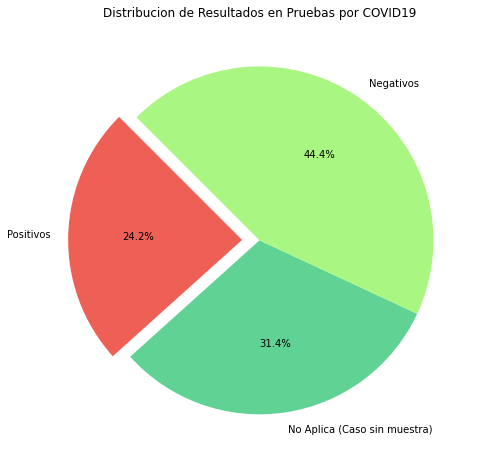

In [27]:
# Graficamos los datos obtenidos con anterioridad

colores = ["#EE6055","#60D394","#AAF683"]
desfase = (0.1, 0, 0)
RESULTADO_ANTIGENO.plot(kind='pie',figsize=(8,8), autopct='%1.1f%%', colors=colores,
               explode=desfase, startangle=135)
plt.ylabel('')
plt.title('Distribucion de Resultados en Pruebas por COVID19')

#plt.legend(labels=resultados.index,loc='upper right')

plt.show()

### Contabilizar las pruebas en base a la clasificación Final 

In [28]:
# con la funcion value_counts contamos cuantos casos hay de cada posible resultado
CLASIFICACION_FINAL = covidMX['CLASIFICACION_FINAL'].value_counts(sort=False)

# Con un diccionario de datos ponemos etiquetas a los codigos en base a los valores 
# usados en el catalogo y después ordenamos de menor a mayor

CLASIFICACION_FINAL.rename({1: 'Positivo Confirmado por Asociación Clínica Epidemiológica ',
                   2: 'Positivo Confirmado por Comité de Dictaminación',  
                   3:'Positivo por Prueba de Antígeno',
                   4:'Inválido por Laboratorio',
                   5:'No Realizado por Laboratorio',
                   6:'Caso Sospechoso',
                   7:'Negativo',
                  }, inplace=True)

CLASIFICACION_FINAL.sort_values(ascending=True, inplace=True)
CLASIFICACION_FINAL

Inválido por Laboratorio                                         11754
Positivo Confirmado por Comité de Dictaminación                  15895
No Realizado por Laboratorio                                     93171
Positivo Confirmado por Asociación Clínica Epidemiológica       357130
Caso Sospechoso                                                 653028
Positivo por Prueba de Antígeno                                6617688
Negativo                                                      10348394
Name: CLASIFICACION_FINAL, dtype: int64

In [29]:
# # Convertir serie a dataframe a
resultados = pd.DataFrame(CLASIFICACION_FINAL).reset_index()
resultados

,index,CLASIFICACION_FINAL
0,Inválido por Laboratorio,11754
1,Positivo Confirmado por Comité de Dictaminación,15895
2,No Realizado por Laboratorio,93171
3,Positivo Confirmado por Asociación Clínica Epi...,357130
4,Caso Sospechoso,653028
5,Positivo por Prueba de Antígeno,6617688
6,Negativo,10348394


In [30]:
resultados.columns = ["RESULTADO","TOTAL"]
resultados

,RESULTADO,TOTAL
0,Inválido por Laboratorio,11754
1,Positivo Confirmado por Comité de Dictaminación,15895
2,No Realizado por Laboratorio,93171
3,Positivo Confirmado por Asociación Clínica Epi...,357130
4,Caso Sospechoso,653028
5,Positivo por Prueba de Antígeno,6617688
6,Negativo,10348394


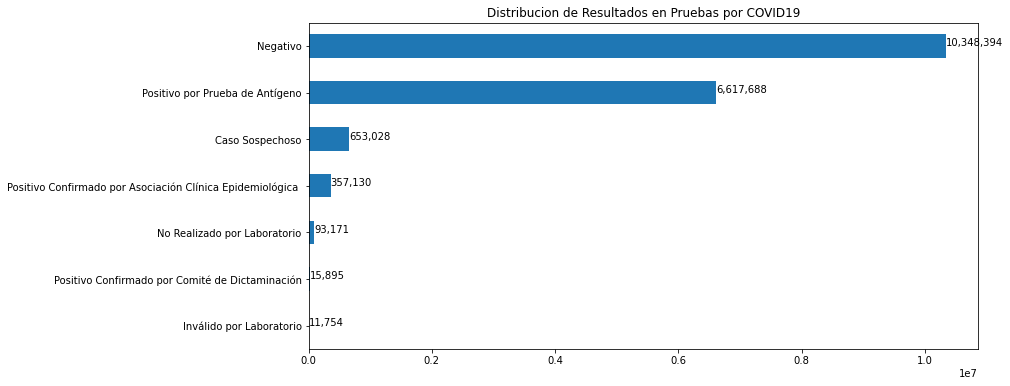

In [31]:
CLASIFICACION_FINAL.plot(kind='barh',figsize=(12,6) )

plt.title('Distribucion de Resultados en Pruebas por COVID19')
for index, value in enumerate(CLASIFICACION_FINAL):
    label = format(int(value), ',')
    plt.annotate(label, xy=(value, index), color='black')

plt.show()

### Distribucion de las pruebas COVID por SEXO

In [32]:
#  verificamos la distribucion de los casos por genero 
SEXO = covidMX['SEXO'].value_counts(sort=False)

# Con un diccionario de datos ponemos etiquetas a los codigos en base a los valores usados en el
# catalogo,  disponible en      https://www.gob.mx/salud/documentos/datos-abiertos-152127 
SEXO.rename({1: 'Mujer', 2: 'Hombre', 99:'No Especificado '}, inplace=True)
SEXO

# De los 18,097,060  Casos analizados, 9,743,130 son Mujeres y  
# 8,353,930 son Hombres

Mujer     9743130
Hombre    8353930
Name: SEXO, dtype: int64

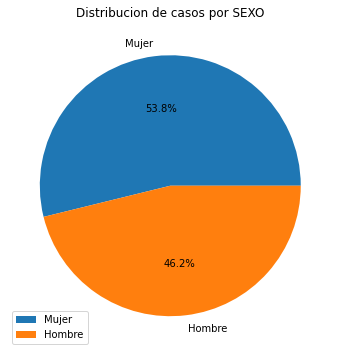

In [33]:
SEXO.plot(kind='pie',figsize=(10,6), autopct='%1.1f%%')
plt.title('Distribucion de casos por SEXO')
lab = str(SEXO.index) + str(SEXO.values)
plt.legend(labels=SEXO.index,loc='lower left')
plt.ylabel('')
plt.show()

### Pruebas realizadas por fecha


In [34]:
# Agregamos una columna total para realizar los calculos necesarios y 
# reflejarlos en esa columna

covidMX["Total"]= 0

In [35]:
# Ceamos un nuevo dataframe con 2 columnas, los agrupamos por fecha y contabilizamos 
# cuantos hay por fecha

totalcasos_x_dia = covidMX[ ["FECHA_INGRESO", "Total"] ]
totalcasos_x_dia = totalcasos_x_dia.groupby( ["FECHA_INGRESO"] ).count().reset_index()
totalcasos_x_dia.head(5)


,FECHA_INGRESO,Total
0,2020-01-01,37
1,2020-01-02,129
2,2020-01-03,211
3,2020-01-04,81
4,2020-01-05,138


Text(0.5, 0, '')

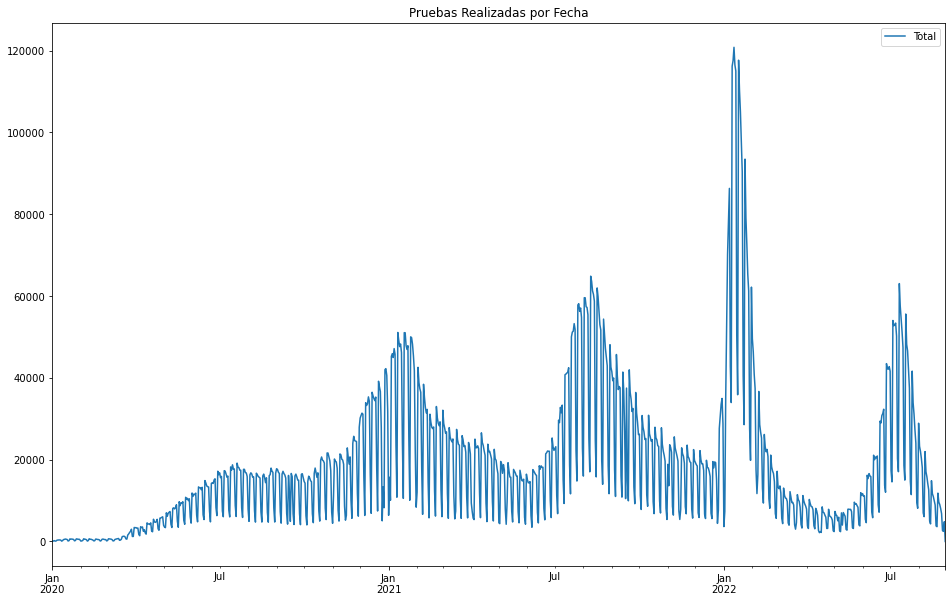

In [36]:
# Graficamos a partir del dataframe totalcasos_x_dia

totalcasos_x_dia.plot.line(x='FECHA_INGRESO',y='Total', figsize=(16,10))
plt.title('Pruebas Realizadas por Fecha')
plt.xlabel('')


### Contabilizar casos positivos por fecha y sexo

In [37]:
positivos = covidMX[( covidMX['CLASIFICACION_FINAL'] <=3 )]  [["FECHA_INGRESO", "FECHA_DEF", "SEXO",
            "EDAD", "CLASIFICACION_FINAL", "DIABETES", "EPOC", "ASMA", "HIPERTENSION", 
           "CARDIOVASCULAR", "OBESIDAD", "RENAL_CRONICA", "TABAQUISMO", "Total"]]

In [38]:
totalcasos_x_dia2 = positivos[ ["FECHA_INGRESO", "Total"] ]
totalcasos_x_dia2 = totalcasos_x_dia2.groupby( ["FECHA_INGRESO"] ).count().reset_index()
totalcasos_x_dia2.head()

,FECHA_INGRESO,Total
0,2020-02-27,4
1,2020-02-28,2
2,2020-02-29,2
3,2020-03-01,2
4,2020-03-02,5


Text(0.5, 0, '')

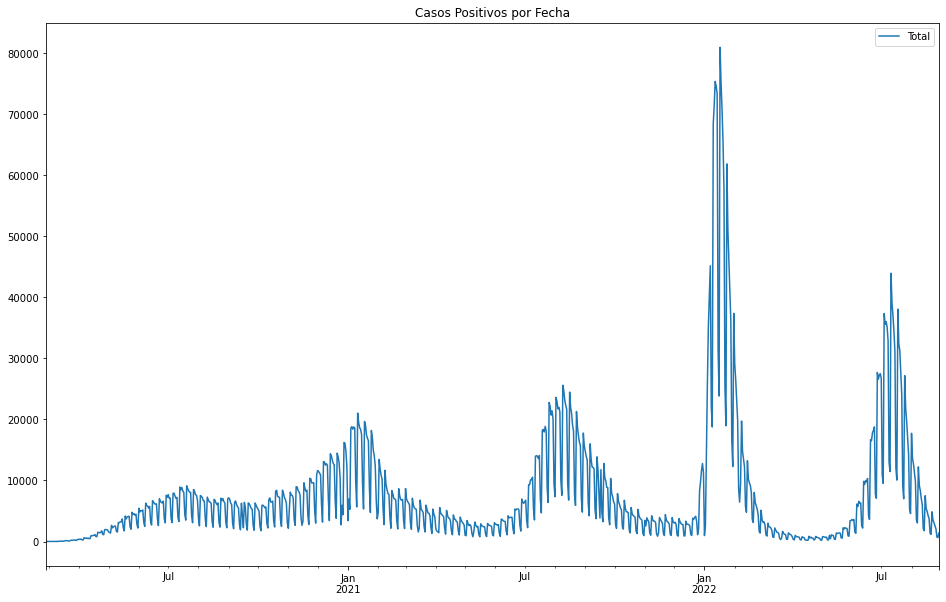

In [39]:
# Graficamos los casos POSITIVOS a partir del dataframe totalcasos_x_dia2

totalcasos_x_dia2.plot.line(x='FECHA_INGRESO',y='Total', figsize=(16,10))
plt.title('Casos Positivos por Fecha')
plt.xlabel('')

In [40]:
positivos["SEXO"].count()

6990713

In [41]:
#  verificamos la distribucion de los casos por genero 
SEXOpositivos = positivos['SEXO'].value_counts(sort=False)

# Con un diccionario de datos ponemos etiquetas a los codigos en base a los valores usados en el
# catalogo,  disponible en      https://www.gob.mx/salud/documentos/datos-abiertos-152127 
SEXOpositivos.rename({1: 'Mujer', 2: 'Hombre', 99:'No Especificado '}, inplace=True)
SEXOpositivos

# De los 6,990,713  Casos POSITIVOS, 3,715,086 son Mujeres y  
# 3,275,627 son Hombres

Mujer     3715086
Hombre    3275627
Name: SEXO, dtype: int64

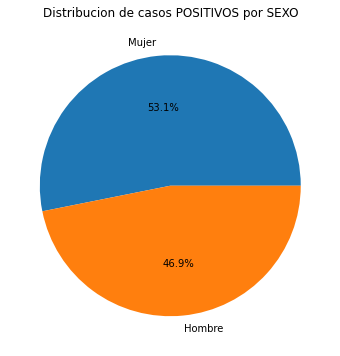

In [42]:
SEXOpositivos.plot(kind='pie',figsize=(10,6), autopct='%1.1f%%')
plt.title('Distribucion de casos POSITIVOS por SEXO')
lab = str(SEXOpositivos.index) + str(SEXOpositivos.values)
plt.ylabel('')
plt.show()

### Comorbilidades principales de los casos positivos

In [43]:
# Generar una serie de datos llamada enfermedades_covid_positivos de acuerdo a los que 
# direon resultado a covid y que presentan alguna enfermedad  cronica

enfermedades_covid_positivos = pd.Series({
    'Diabetes' : len(positivos.query('DIABETES ==1')),
    'EPOC' : len(positivos.query('EPOC ==1')),
    'ASMA' : len(positivos.query('ASMA ==1 ')),
    'Hipertension' : len(positivos.query('HIPERTENSION ==1 ')),
    'Cardiovascular' : len(positivos.query('CARDIOVASCULAR ==1 ')),
    'Obesidad' : len(positivos.query('OBESIDAD ==1 ')),
    'Renal' : len(positivos.query('RENAL_CRONICA ==1 ')),
    'Tabaquismo' : len(positivos.query('TABAQUISMO ==1 '))
,
})
enfermedades_covid_positivos

Diabetes          617015
EPOC               47831
ASMA              130612
Hipertension      833324
Cardiovascular     69640
Obesidad          678439
Renal              66699
Tabaquismo        386001
dtype: int64

In [44]:
# Ordenar el resultado para graficar
enfermedades_covid_positivos.sort_values(ascending=True, inplace=True)
enfermedades_covid_positivos

EPOC               47831
Renal              66699
Cardiovascular     69640
ASMA              130612
Tabaquismo        386001
Diabetes          617015
Obesidad          678439
Hipertension      833324
dtype: int64

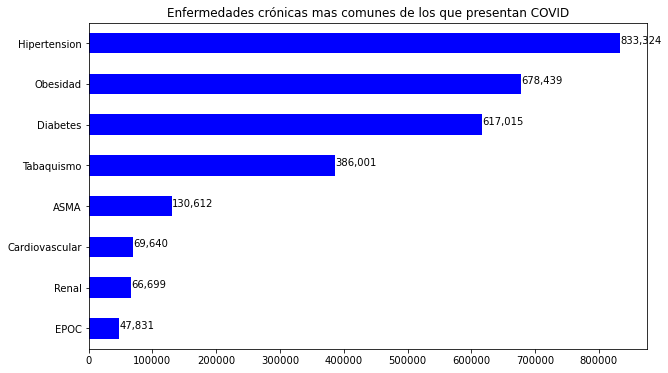

In [45]:
# graficar las enfermedades más comunes de los que presentan COVID
enfermedades_covid_positivos.plot(kind='barh',figsize=(10,6), color='blue')
plt.title('Enfermedades crónicas mas comunes de los que presentan COVID')
for index, value in enumerate(enfermedades_covid_positivos):
    label = format(int(value), ',')
    plt.annotate(label, xy=(value, index), color='black')
    
plt.show()

### Enfermedades más comunes de los que fallecieron y dieron positivo a COVID

In [46]:
# Generar una serie de datos llamada enfermedades_covid_positivos de acuerdo a los que 
# direon resultado a covid y que presentan alguna enfermedad  cronica

fallecimientos_covid_positivos = pd.Series({
    'Diabetes' : len(positivos.query('DIABETES ==1 & FECHA_DEF != "9999-99-99"')),
    'EPOC' : len(positivos.query('EPOC ==1  & FECHA_DEF != "9999-99-99"')),
    'ASMA' : len(positivos.query('ASMA ==1  & FECHA_DEF != "9999-99-99"')),
    'Hipertension' : len(positivos.query('HIPERTENSION ==1  & FECHA_DEF != "9999-99-99"')),
    'Cardiovascular' : len(positivos.query('CARDIOVASCULAR ==1  & FECHA_DEF != "9999-99-99"')),
    'Obesidad' : len(positivos.query('OBESIDAD ==1 & FECHA_DEF != "9999-99-99"')),
    'Renal' : len(positivos.query('RENAL_CRONICA ==1 & FECHA_DEF != "9999-99-99"')),
    'Tabaquismo' : len(positivos.query('TABAQUISMO ==1 & FECHA_DEF != "9999-99-99"'))
,
})
fallecimientos_covid_positivos

Diabetes          120567
EPOC               14378
ASMA                5619
Hipertension      145280
Cardiovascular     16516
Obesidad           67602
Renal              23527
Tabaquismo         24301
dtype: int64

In [47]:
# Ordenar el resultado para graficar
fallecimientos_covid_positivos.sort_values(ascending=True, inplace=True)
fallecimientos_covid_positivos

ASMA                5619
EPOC               14378
Cardiovascular     16516
Renal              23527
Tabaquismo         24301
Obesidad           67602
Diabetes          120567
Hipertension      145280
dtype: int64

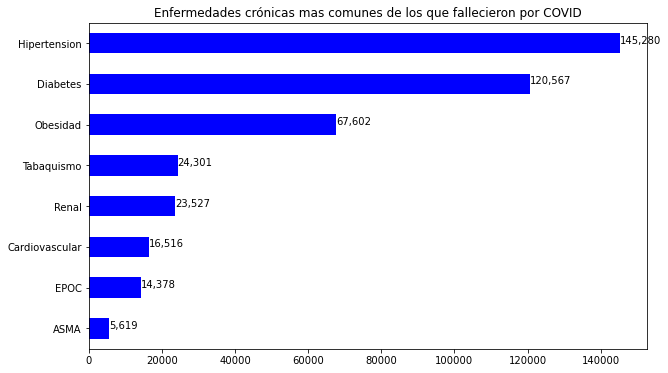

In [48]:
# graficar enfermedades mas comunes de los que fallecieron COVID

fallecimientos_covid_positivos.plot(kind='barh',figsize=(10,6), color='blue')
plt.title('Enfermedades crónicas mas comunes de los que fallecieron por COVID')
for index, value in enumerate(fallecimientos_covid_positivos):
    label = format(int(value), ',')
    plt.annotate(label, xy=(value, index), color='black')
    
plt.show()

###  Analisis covid por Edad

In [49]:
# Mostrar el numero de casos positivos a covid por edad
# Aqui hay unos que tienen edad = 0 que puede significar un bebe de meses
# Tambien hay valores de personas mayores a 100 años
# Estos valores para la edad asi viene en la base de datos

covid_por_edad = covidMX[['EDAD', 'Total']].groupby("EDAD").count().reset_index()
covid_por_edad.head()

,EDAD,Total
0,0,62524
1,1,77471
2,2,66182
3,3,61313
4,4,59076


Text(0, 0.5, 'Número de casos')

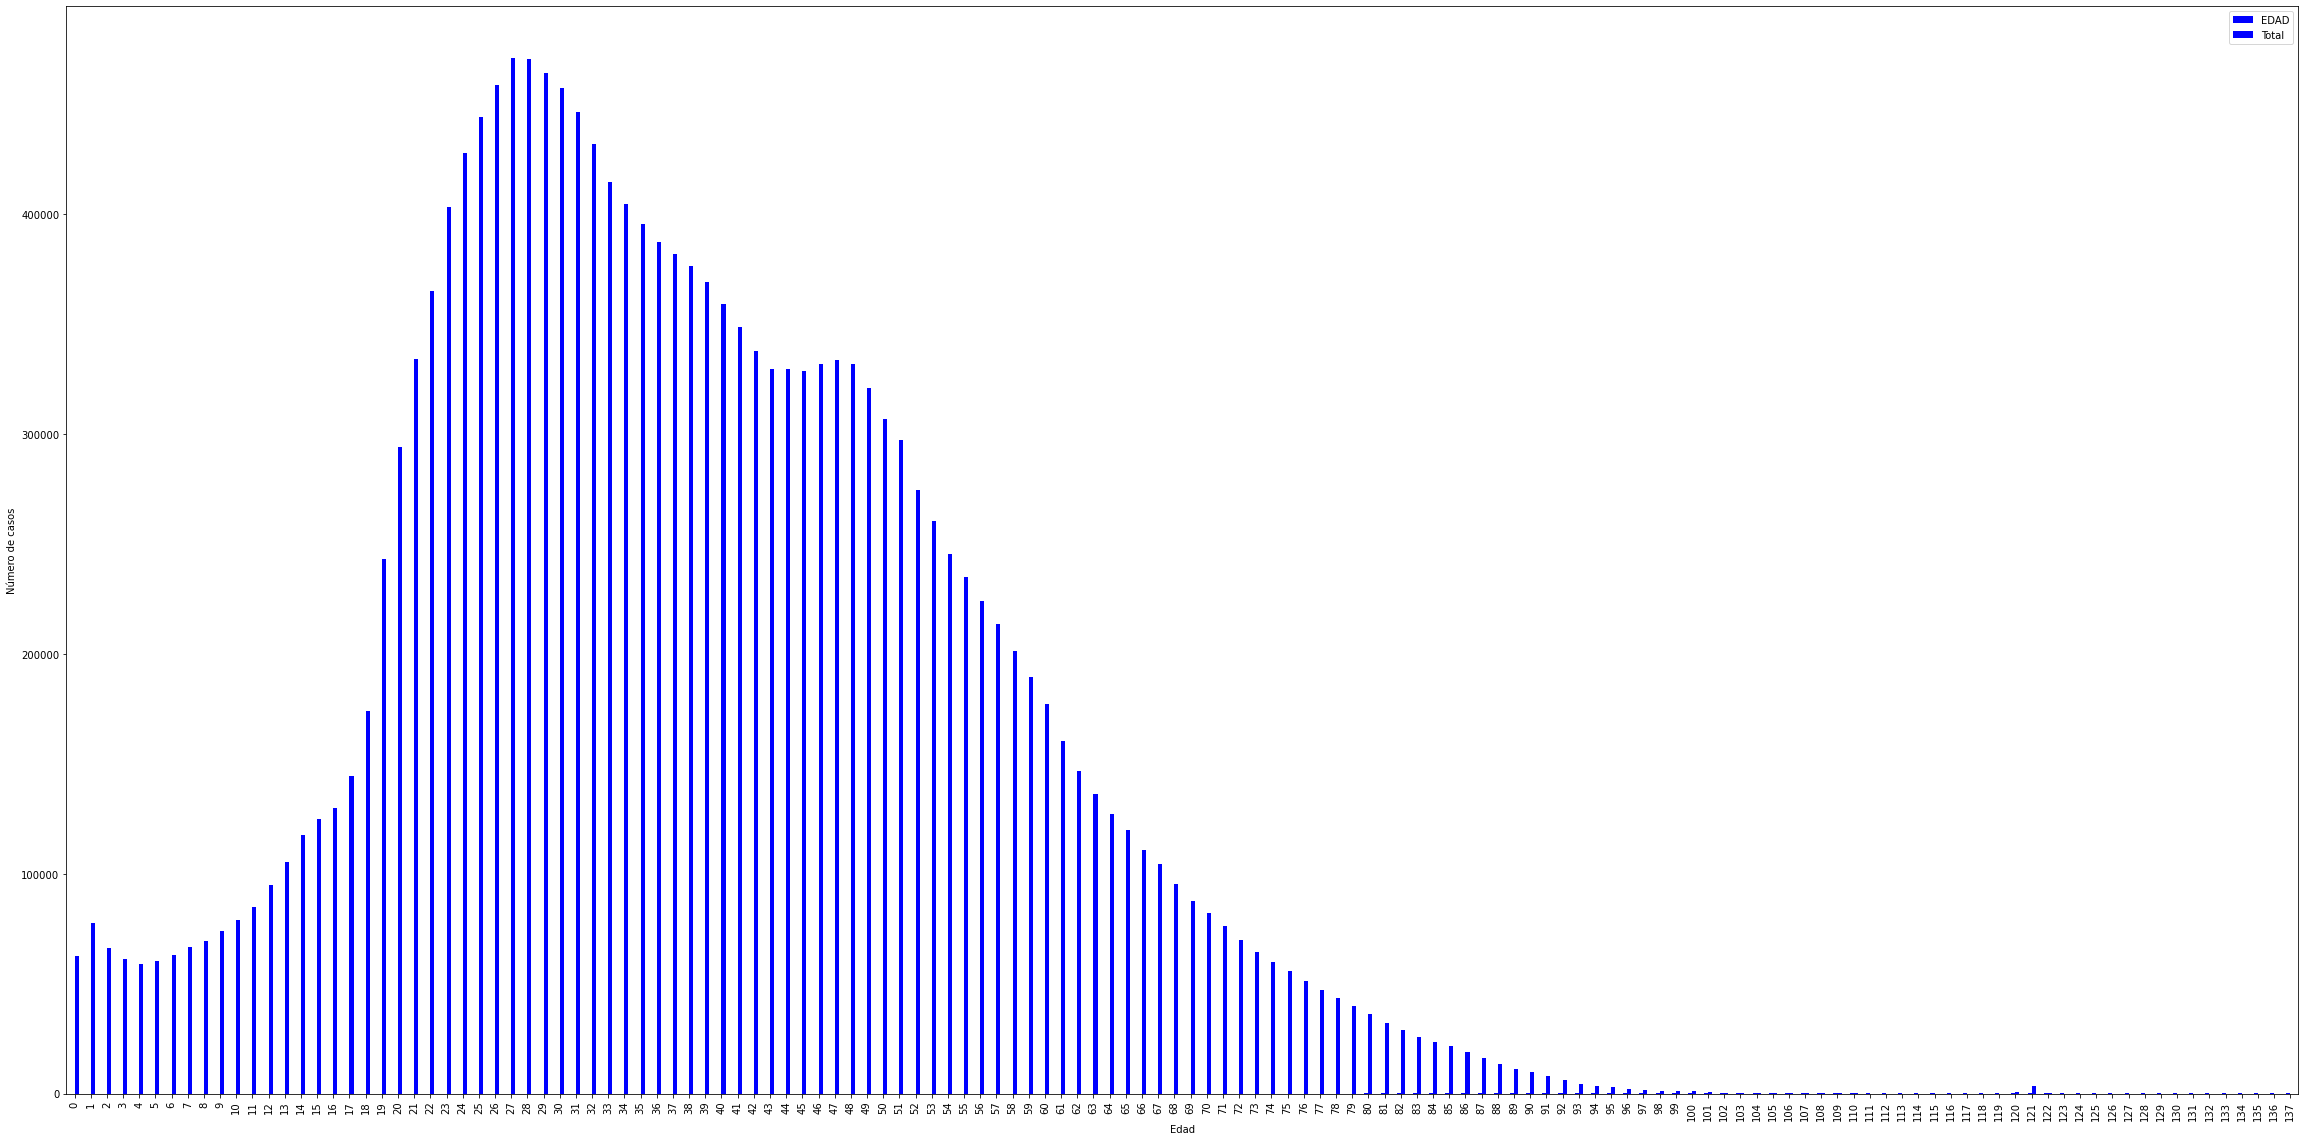

In [50]:
covid_por_edad.plot(kind='bar',figsize=(40,20), color='blue')
plt.xlabel('Edad')
plt.ylabel('Número de casos')


In [51]:
edad = positivos['EDAD'].value_counts(sort=False)
edad

55      96554
35     156072
56      92372
58      82879
37     153853
        ...  
121        31
111        19
147         1
122        15
135         1
Name: EDAD, Length: 125, dtype: int64

In [52]:
# Obtenemos las 10 edades que mas casos positivos 
edad.sort_values(ascending=False).head(10)

28    177992
29    176532
27    175807
30    174087
31    170651
26    169874
32    168012
33    163401
25    162183
34    160041
Name: EDAD, dtype: int64

Text(0.5, 1.0, 'Positivos por edad')

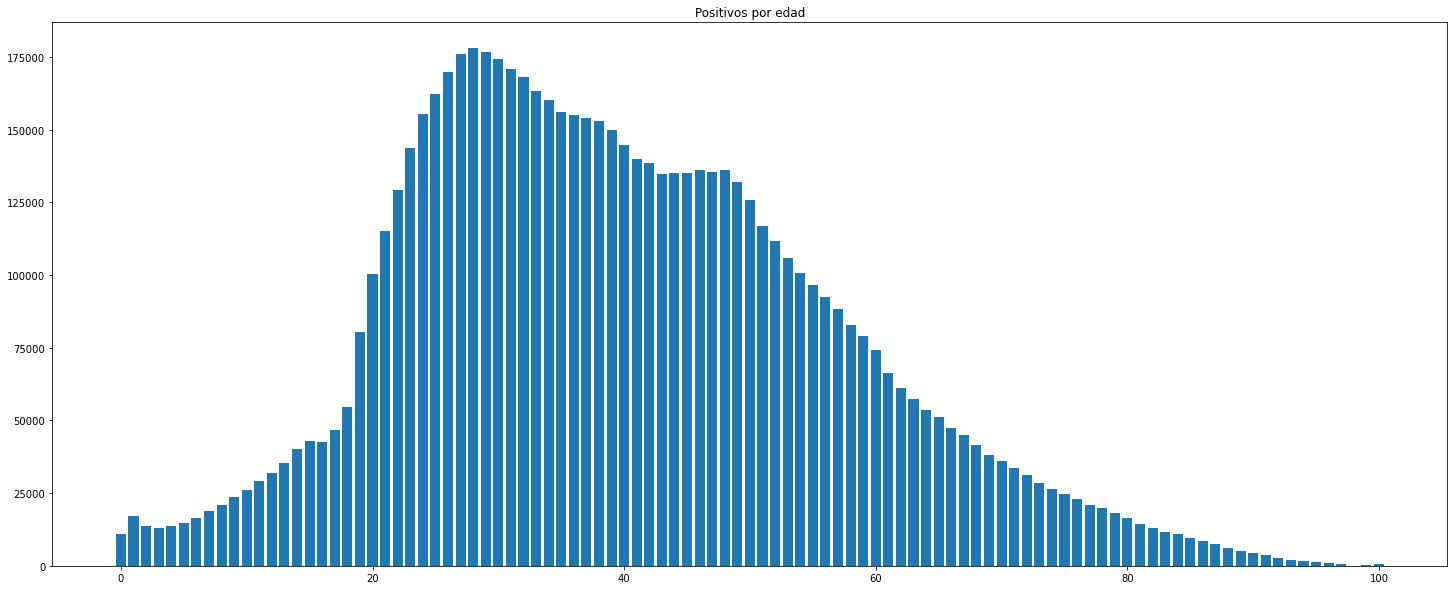

In [53]:
fig, axs = plt.subplots(figsize=(25,10))

axs.bar(edad.head(100).index, edad.head(100))

axs.set_title('Positivos por edad')

###   Distribución de Hipertensión y Diabetes por Sexo y Edad

In [54]:
#  Reemplazamos los valores numéricos por su descripción en el dataframe positivos  
#  las columnas HIPERTENSION y DIABETES usando un diccionario

positivos = positivos.replace( { 'HIPERTENSION': { 1: 'Si', 2: 'No', 98: 'Se ignora' },
                                 'DIABETES': {1: 'Si', 2:'No', 98: 'Se ignora'} ,
                                 'SEXO': {1: 'MUJER', 2:'HOMBRE', 99: 'OTRO'} 
                             })

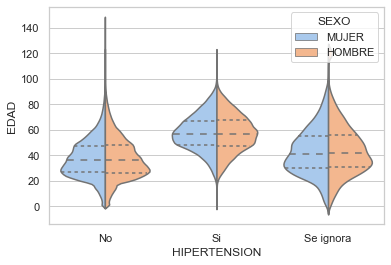

In [55]:
# Usando la libreria seaborn usamos un grafico de violín

sns.set(style = 'whitegrid', palette ='pastel', color_codes = True)

ax = sns.violinplot( data = positivos, 
               x = 'HIPERTENSION', y = 'EDAD',
               hue = 'SEXO', split = True,
               inner = 'quart',
               saturation = 0.8)
plt.show()

In [56]:
# separar para contabilizar los que tienen HIPERTENSION y son  HOMBREs

HIPER_hombres = positivos[ ( positivos['HIPERTENSION'] == "Si") & 
                          (positivos['SEXO'] == "HOMBRE")] ["EDAD"]
HIPER_hombres.head()

91     61
112    67
138    58
208    65
209    53
Name: EDAD, dtype: int64

In [57]:
HIPER_hombres.value_counts().sort_values().tail(15)

48     8973
62     9066
49     9208
50     9340
52     9400
61     9457
51     9479
54     9533
53     9654
55     9781
56     9918
60     9926
57    10017
58    10060
59    10086
Name: EDAD, dtype: int64

In [58]:
HIPER_hombres.mean()

57.55228338406367

In [59]:
# separar para contabilizar los que tienen HIPERTENSION y son  HOMBREs

HIPER_mujeres = positivos[ ( positivos['HIPERTENSION'] == "Si") & 
                          (positivos['SEXO'] == "MUJER")] ["EDAD"]
HIPER_mujeres.value_counts().sort_values().tail(15)

48    11139
62    11149
61    11505
49    12036
60    12156
50    12182
51    12229
59    12330
58    12433
53    12576
52    12669
55    12690
56    12702
54    12800
57    12971
Name: EDAD, dtype: int64

In [61]:
HIPER_mujeres.mean()

57.812210209553236

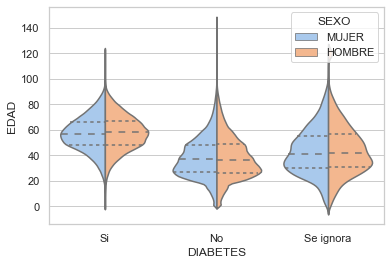

In [60]:
sns.set(style = 'whitegrid', palette ='pastel', color_codes = True)

ax = sns.violinplot( data = positivos, 
               x = 'DIABETES', y = 'EDAD',
               hue = 'SEXO', split = True,
               inner = 'quart',
               saturation = 0.8)
plt.show()

<AxesSubplot:xlabel='DIABETES', ylabel='EDAD'>

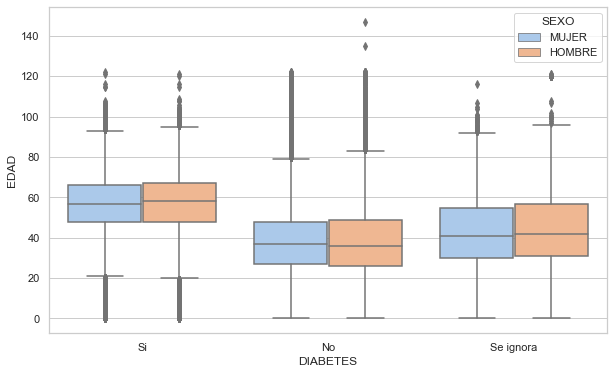

In [62]:
# Diagrama de cajas con Orientacion Vertical
#  Valores atípicos
fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(data = positivos, x="DIABETES", y="EDAD", hue = 'SEXO' ) 

In [63]:
# Contabilizar el rango de edades

positivos["EDAD"].value_counts().sort_index()

0      10962
1      17286
2      13631
3      12932
4      13612
       ...  
120      200
121       31
122       15
135        1
147        1
Name: EDAD, Length: 125, dtype: int64

###  Segmentacion de datos por  edades

- Se usa la funcion **cut** de pandas
- Usar **cut** cuando se desea segmentar y ordenar valores de datos en contenedores. 
- Esta función también es útil para **pasar de una variable continua a una variable categórica**. 
- Por ejemplo, cortar podría **convertir edades en grupos de rangos de edad**. 
- Admite el agrupamiento en un número igual de contenedores o en una matriz de contenedores especificada previamente.

In [64]:
covid_por_edad.head(12)

,EDAD,Total
0,0,62524
1,1,77471
2,2,66182
3,3,61313
4,4,59076
5,5,60237
6,6,62981
7,7,66515
8,8,69495
9,9,73959


In [65]:
bins = [-1, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99, 130]

In [66]:
names = ["0-9", "10-19", "20-29", "30-39", "40-49", "50-59",
         "60-9", "70-79", "80-89", "90-99", "+100"]

In [67]:
# Se contabiliza cuantos positivos hay por edad
covid_por_edad["EDAD"] = pd.cut(covid_por_edad["EDAD"], bins, labels = names)
covid_por_edad.head(12)

,EDAD,Total
0,0-9,62524
1,0-9,77471
2,0-9,66182
3,0-9,61313
4,0-9,59076
5,0-9,60237
6,0-9,62981
7,0-9,66515
8,0-9,69495
9,0-9,73959


In [68]:
# Agrupamos por grupos de edad  

covid_por_edad = covid_por_edad[["EDAD","Total"]].groupby("EDAD").sum().reset_index()
covid_por_edad

,EDAD,Total
0,0-9,659753
1,10-19,1299184
2,20-29,4134576
3,30-39,4065780
4,40-49,3353382
5,50-59,2448942
6,60-9,1266224
7,70-79,590568
8,80-89,228304
9,90-99,41320


In [69]:
# Ponemos la edad como indice

covid_por_edad.set_index("EDAD", inplace = True)
covid_por_edad

,Total
EDAD,
0-9,659753
10-19,1299184
20-29,4134576
30-39,4065780
40-49,3353382
50-59,2448942
60-9,1266224
70-79,590568
80-89,228304


<AxesSubplot:ylabel='EDAD'>

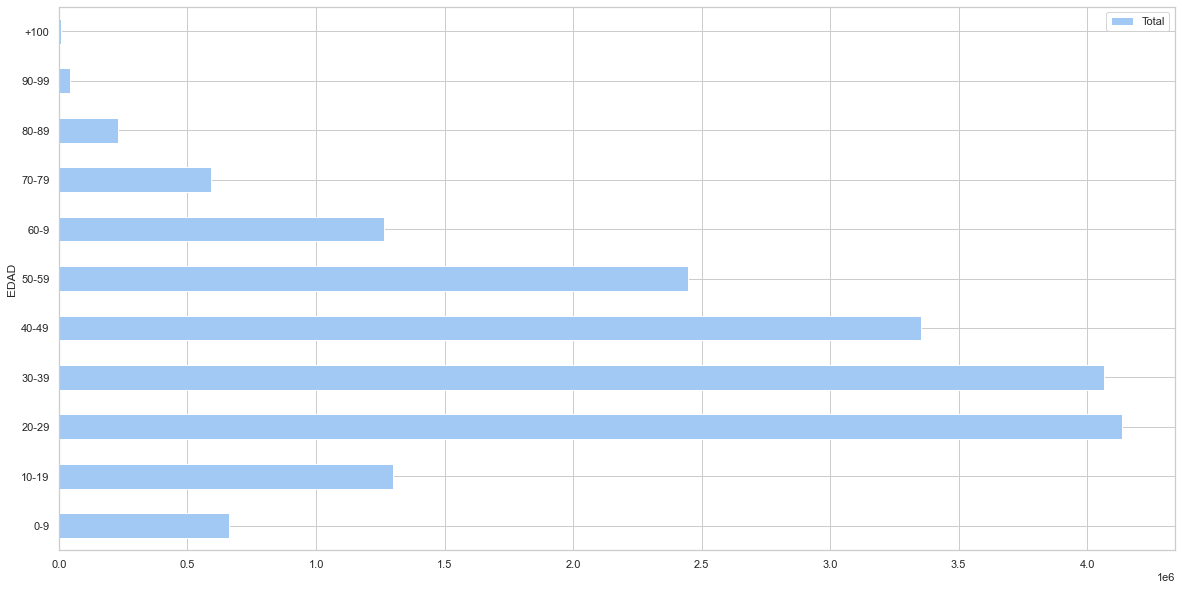

In [70]:
# graficamos

covid_por_edad.plot.barh(figsize=(20,10))

### Diagramas de Violín para representar la clasificación final de la prueba por Sexo y Edad

In [71]:
CLASIFICACION_FINAL = covidMX[[ "CLASIFICACION_FINAL", "SEXO", "EDAD" ]]

In [72]:
CLASIFICACION_FINAL.count()

CLASIFICACION_FINAL    18097060
SEXO                   18097060
EDAD                   18097060
dtype: int64

In [73]:
CLASIFICACION_FINAL.head()

,CLASIFICACION_FINAL,SEXO,EDAD
0,3,1,55
1,6,2,59
2,7,1,42
3,3,2,35
4,7,2,51


In [74]:
#  Reemplazamos los valores numéricos por su descripción en el dataframe positivos  
#  las columnas CLASIFICACION_FINAL y SEXO usando un diccionario

CLASIFICACION_FINAL = CLASIFICACION_FINAL.replace( { 'CLASIFICACION_FINAL': { 
                   1: 'Positivo',
                   2: 'Positivo',  
                   3: 'Positivo',
                   4: 'Inválido por Laboratorio',
                   5: 'No Realizado por Laboratorio',
                   6: 'Caso Sospechoso',
                   7: 'Negativo' }, 
                  'SEXO': {1: 'MUJER', 2:'HOMBRE', 99: 'OTRO'}
                 })


In [75]:
CLASIFICACION_FINAL.head()

,CLASIFICACION_FINAL,SEXO,EDAD
0,Positivo,MUJER,55
1,Caso Sospechoso,HOMBRE,59
2,Negativo,MUJER,42
3,Positivo,HOMBRE,35
4,Negativo,HOMBRE,51


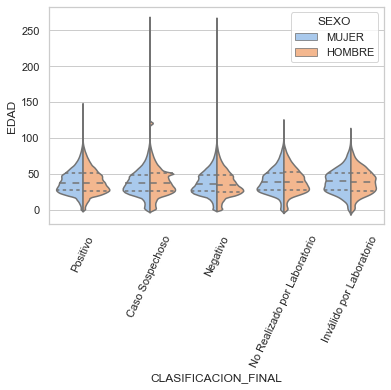

In [76]:

sns.set(style = 'whitegrid', palette ='pastel', color_codes = True)

ax = sns.violinplot( data = CLASIFICACION_FINAL, figsize=(20,10), 
               x = 'CLASIFICACION_FINAL', y = 'EDAD',
               hue = 'SEXO', split = True,
               inner = 'quart',
               saturation = 0.8)
plt.xticks(rotation=65)

plt.show()

In [77]:
import folium
import geopandas
import json

- GeoJSON es un formato de intercambio de datos geoespaciales de código abierto que representa entidades geográficas sencillas y sus atributos no espaciales. 
- Basado en JavaScript Object Notation (JSON), 
- GeoJSON es un formato para codificar estructuras de datos geográficos. 
- Utiliza un sistema de referencia de coordenadas geográficas, el Sistema geodésico mundial de 1984, y unidades de grados decimales.

In [79]:
# geodata, descargado de https://github.com/angelnmara/geojson
# Archivo con los poligonos de coordenadas de los estados de la republica mexicana

geo_json_data = json.load(open("mexicoHigh.json"))


In [80]:
df_totalcasos = covidMX[["ENTIDAD_NAC","Total"]]  
df_totalcasos = df_totalcasos.groupby(['ENTIDAD_NAC']).count().reset_index()
df_totalcasos.head()

,ENTIDAD_NAC,Total
0,1,212174
1,2,230089
2,3,200562
3,4,109053
4,5,449105


In [81]:
# Mapeo de entidades
mapping_dict = { 1:"MX-AGU", 2:"MX-BCN", 3:"MX-BCS", 4:"MX-CAM", 5:"MX-COA", 6:"MX-COL",
               7:"MX-CHP", 8:"MX-CHH", 9:"MX-CMX", 10:"MX-DUR", 11:"MX-GUA", 12:"MX-GRO",
               13:"MX-HID", 14:"MX-JAL", 15:"MX-MEX", 16:"MX-MIC", 17:"MX-MOR", 18:"MX-NAY",
               19:"MX-NLE", 20:"MX-OAX", 21:"MX-PUE", 22:"MX-QUE", 23:"MX-ROO", 24:"MX-SLP",
               25:"MX-SIN", 26:"MX-SON", 27:"MX-TAB", 28:"MX-TAM", 29:"MX-TLA", 30:"MX-VER",
               31:"MX-YUC", 32:"MX-ZAC" , 99:"MX-XXX"      }

df_totalcasos['ENTIDAD_NAC'] = df_totalcasos.ENTIDAD_NAC.map(mapping_dict)

In [82]:
# Mostrar la cantidad de casos por estado, usando la clave para mostrar en mapa coroplético
df_totalcasos.sort_values("Total", ascending=False).head()

,ENTIDAD_NAC,Total
8,MX-CMX,5559269
14,MX-MEX,1898070
10,MX-GUA,794762
18,MX-NLE,699651
29,MX-VER,609583


In [83]:
# Definir 
bins = list([100000, 200000,300000,400000, 2000000, 5600000])
bins

#bins = list(df_totalcasos["Total"].quantile([0, 0.25, 0.5, 0.75, 1]))


[100000, 200000, 300000, 400000, 2000000, 5600000]

In [84]:
# Colores   BuPu,  YlGn, YlGnBu,  GnYlRe
# 'BuGn', 'BuPu', 'GnBu', 'OrRd', 'PuBu', 'PuBuGn', 'PuRd', 'RdPu', 'YlGn', 'YlGnBu', 'YlOrBr', and 'YlOrRd'
# https://github.com/python-visualization/folium/issues/1166

mapa3 = folium.Map(location=[24.0359, -104.6403], zoom_start=5)

mapa3.choropleth(
geo_data = geo_json_data,
data = df_totalcasos,
columns = ['ENTIDAD_NAC', 'Total'],
key_on = 'feature.id',
fill_color = 'YlOrRd',
bins = bins, 
fill_opacity = 0.7,
line_opacity = 0.4,
highlight=True,
zoom_control = False, 
legend_name='Casos COVID por Estado')



mapa3

C:\Anaconda3\envs\Diplomado python\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(
C:\Anaconda3\envs\Diplomado python\lib\site-packages\branca\colormap.py:90: RuntimeWarning: overflow encountered in long_scalars
  self.color_domain = [self.vmin + (self.vmax-self.vmin) * k/499. for


### Marcadores

In [85]:
pd_geoEstados = pd.read_csv("claves_ent.csv")
pd_geoEstados.head()

,Clave,Estado,Latitud,Longitud
0,MX-AGU,Aguascalientes,21.882340,-102.282590
1,MX-BCN,Baja California,30.441883,-115.140850
2,MX-BCS,Baja California Sur,23.939971,-110.443570
3,MX-CAM,Campeche,19.539189,-89.646626
4,MX-COA,Coahuila,28.198710,-102.678149


In [86]:
estadosMerge = pd.merge(df_totalcasos, pd_geoEstados, left_on="ENTIDAD_NAC",
                  right_on="Clave")
estadosMerge.head()

,ENTIDAD_NAC,Total,Clave,Estado,Latitud,Longitud
0,MX-AGU,212174,MX-AGU,Aguascalientes,21.882340,-102.282590
1,MX-BCN,230089,MX-BCN,Baja California,30.441883,-115.140850
2,MX-BCS,200562,MX-BCS,Baja California Sur,23.939971,-110.443570
3,MX-CAM,109053,MX-CAM,Campeche,19.539189,-89.646626
4,MX-COA,449105,MX-COA,Coahuila,28.198710,-102.678149


In [87]:
# Borramos y Reacomodamos las columnas

estadosMerge.drop("ENTIDAD_NAC", axis = 1, inplace = True)
estadosMerge = estadosMerge[["Clave", "Estado", "Latitud", "Longitud", "Total"]]
estadosMerge.head()

,Clave,Estado,Latitud,Longitud,Total
0,MX-AGU,Aguascalientes,21.882340,-102.282590,212174
1,MX-BCN,Baja California,30.441883,-115.140850,230089
2,MX-BCS,Baja California Sur,23.939971,-110.443570,200562
3,MX-CAM,Campeche,19.539189,-89.646626,109053
4,MX-COA,Coahuila,28.198710,-102.678149,449105


In [88]:
for lat, lng, label, label2 in zip(estadosMerge.Latitud, estadosMerge.Longitud, 
                                   estadosMerge.Estado,  estadosMerge.Total ):
    folium.CircleMarker(
    [lat, lng], 
    radius=5,
    color='yellow',
    fill=True,
    bins= bins,
    fill_color='YlOrRd',
    fill_opacity=0.6,
    tooltip= "Estado:" + str(label)  + '<br>' +
            "Total_Casos:" + str(label2)
    ).add_to(mapa3)

mapa3

C:\Anaconda3\envs\Diplomado python\lib\site-packages\branca\colormap.py:90: RuntimeWarning: overflow encountered in long_scalars
  self.color_domain = [self.vmin + (self.vmax-self.vmin) * k/499. for
